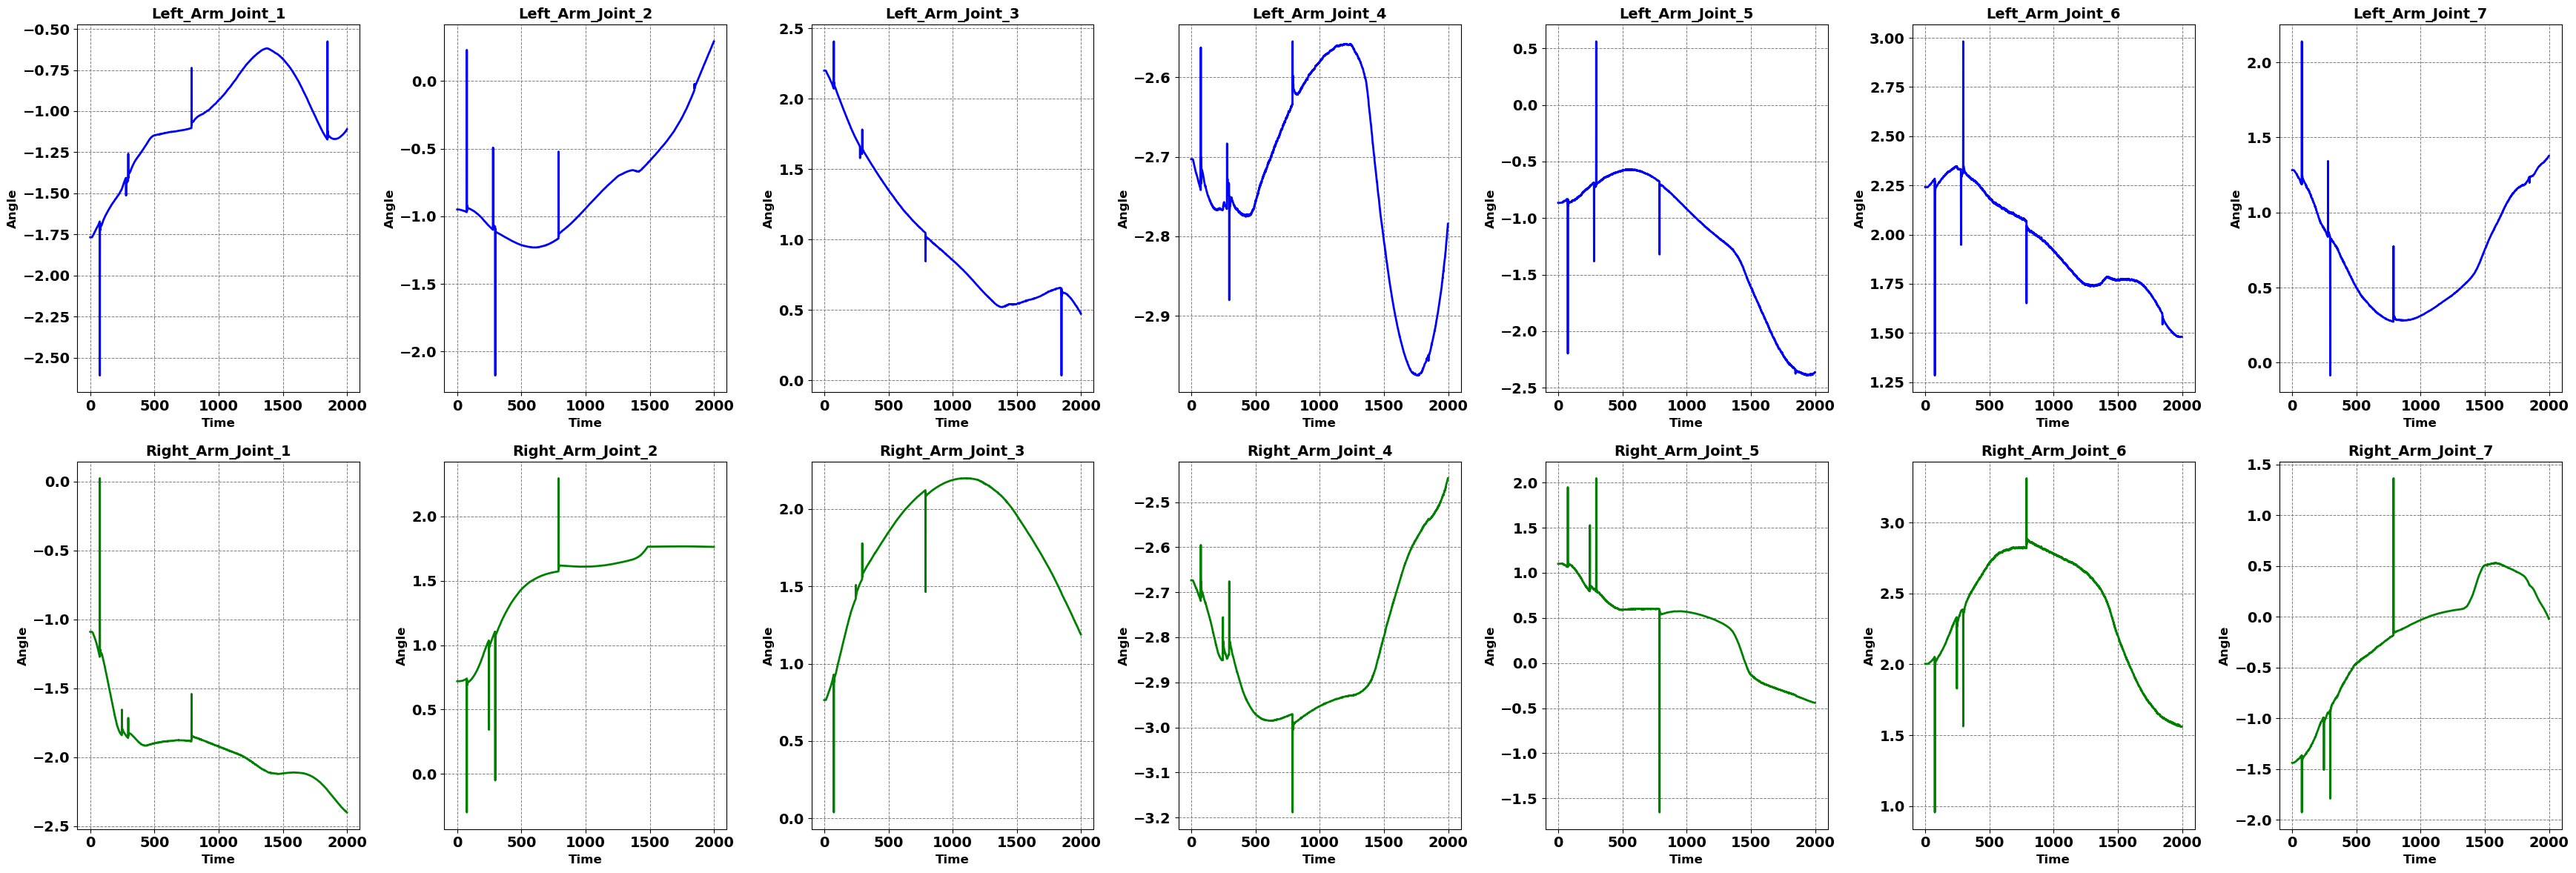

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_name = 'joint_angles.csv'
df = pd.read_csv(file_name)

# Extract joint angle columns (assuming they are named Left_Arm_Joint_1, ..., Right_Arm_Joint_7)
left_arm_joint_names = [f'Left_Arm_Joint_{i}' for i in range(1, 8)]
right_arm_joint_names = [f'Right_Arm_Joint_{i}' for i in range(1, 8)]

# Create subplots: 2 rows, 7 columns (2x7), increase figure size for larger plots
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(35, 12))  # Larger figure size

# Adjust general plot styling
plt.rcParams.update({
    'font.size': 14,             # General font size
    'font.weight': 'bold',       # Bold font for better visibility
    'grid.color': 'gray',        # Grid color
    'grid.linestyle': '--',      # Dotted grid lines
    'grid.linewidth': 0.7,       # Thinner grid lines for better aesthetics
})

# Plot each joint angle in its respective subplot and add grid
for i, joint_name in enumerate(left_arm_joint_names):
    axes[0, i].plot(df[joint_name], linewidth=2, color='blue')  # Set color for clarity
    axes[0, i].set_title(joint_name, fontsize=14, weight='bold')  # Bold titles
    axes[0, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[0, i].set_ylabel('Angle', fontsize=12, weight='bold')
    axes[0, i].grid(True)  # Add grid to the plot

for i, joint_name in enumerate(right_arm_joint_names):
    axes[1, i].plot(df[joint_name], linewidth=2, color='green')  # Set a different color
    axes[1, i].set_title(joint_name, fontsize=14, weight='bold')
    axes[1, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[1, i].set_ylabel('Angle', fontsize=12, weight='bold')
    axes[1, i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a .png file with high resolution
output_file = 'joint_angles_plot_high_res.pdf'
plt.savefig(output_file, format='pdf', dpi=600)  # Increase dpi to 600 for higher resolution

# Show the plot
plt.show()


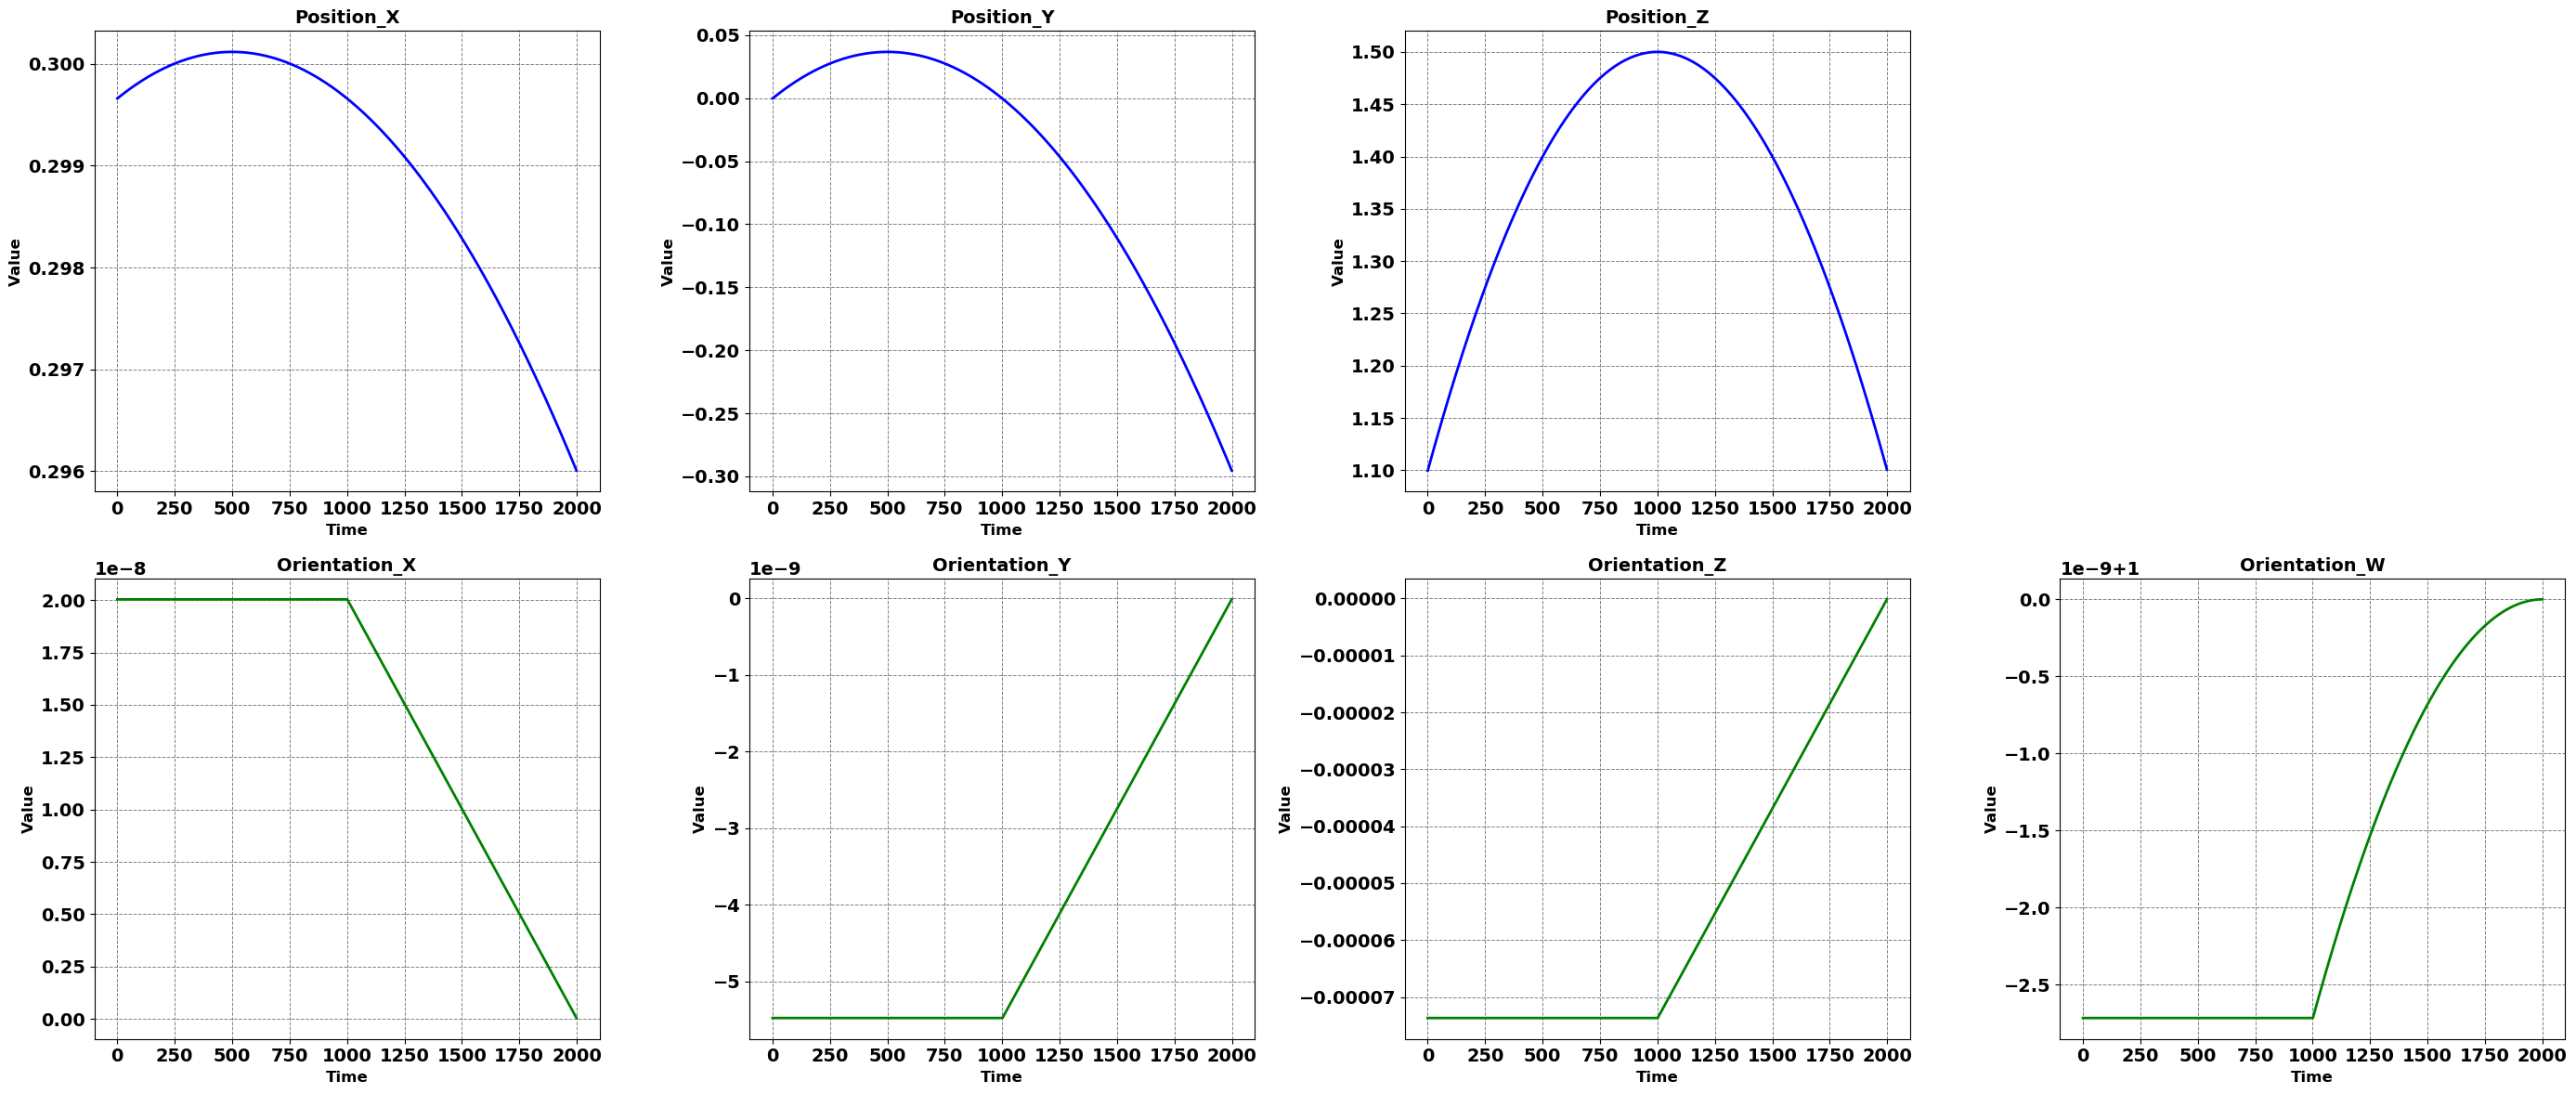

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_name = 'box_trajectory.csv'
df = pd.read_csv(file_name)

# Define position and orientation columns
position_columns = ['Position_X', 'Position_Y', 'Position_Z']
orientation_columns = ['Orientation_X', 'Orientation_Y', 'Orientation_Z', 'Orientation_W']

# Create subplots: 2 rows, 4 columns to accommodate both position and orientation data
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(28, 12))  # Adjust figure size for larger plots

# Adjust general plot styling
plt.rcParams.update({
    'font.size': 14,             # General font size
    'font.weight': 'bold',       # Bold font for better visibility
    'grid.color': 'gray',        # Grid color
    'grid.linestyle': '--',      # Dotted grid lines
    'grid.linewidth': 0.7,       # Thinner grid lines for better aesthetics
})

# Plot position data (X, Y, Z) in the first row
for i, col in enumerate(position_columns):
    axes[0, i].plot(df[col], linewidth=2, color='blue')  # Set color for clarity
    axes[0, i].set_title(col, fontsize=14, weight='bold')  # Bold titles
    axes[0, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[0, i].set_ylabel('Value', fontsize=12, weight='bold')
    axes[0, i].grid(True)  # Add grid to the plot

# Remove the last empty subplot in the first row (we only have 3 position columns)
fig.delaxes(axes[0, 3])

# Plot orientation data (X, Y, Z, W) in the second row
for i, col in enumerate(orientation_columns):
    axes[1, i].plot(df[col], linewidth=2, color='green')  # Set a different color for clarity
    axes[1, i].set_title(col, fontsize=14, weight='bold')  # Bold titles
    axes[1, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[1, i].set_ylabel('Value', fontsize=12, weight='bold')
    axes[1, i].grid(True)  # Add grid to the plot

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a .pdf file with high resolution
output_file = 'box_trajectory_plot_high_res.pdf'
plt.savefig(output_file, format='pdf', dpi=600)  # Increase dpi to 600 for higher resolution

# Show the plot
plt.show()


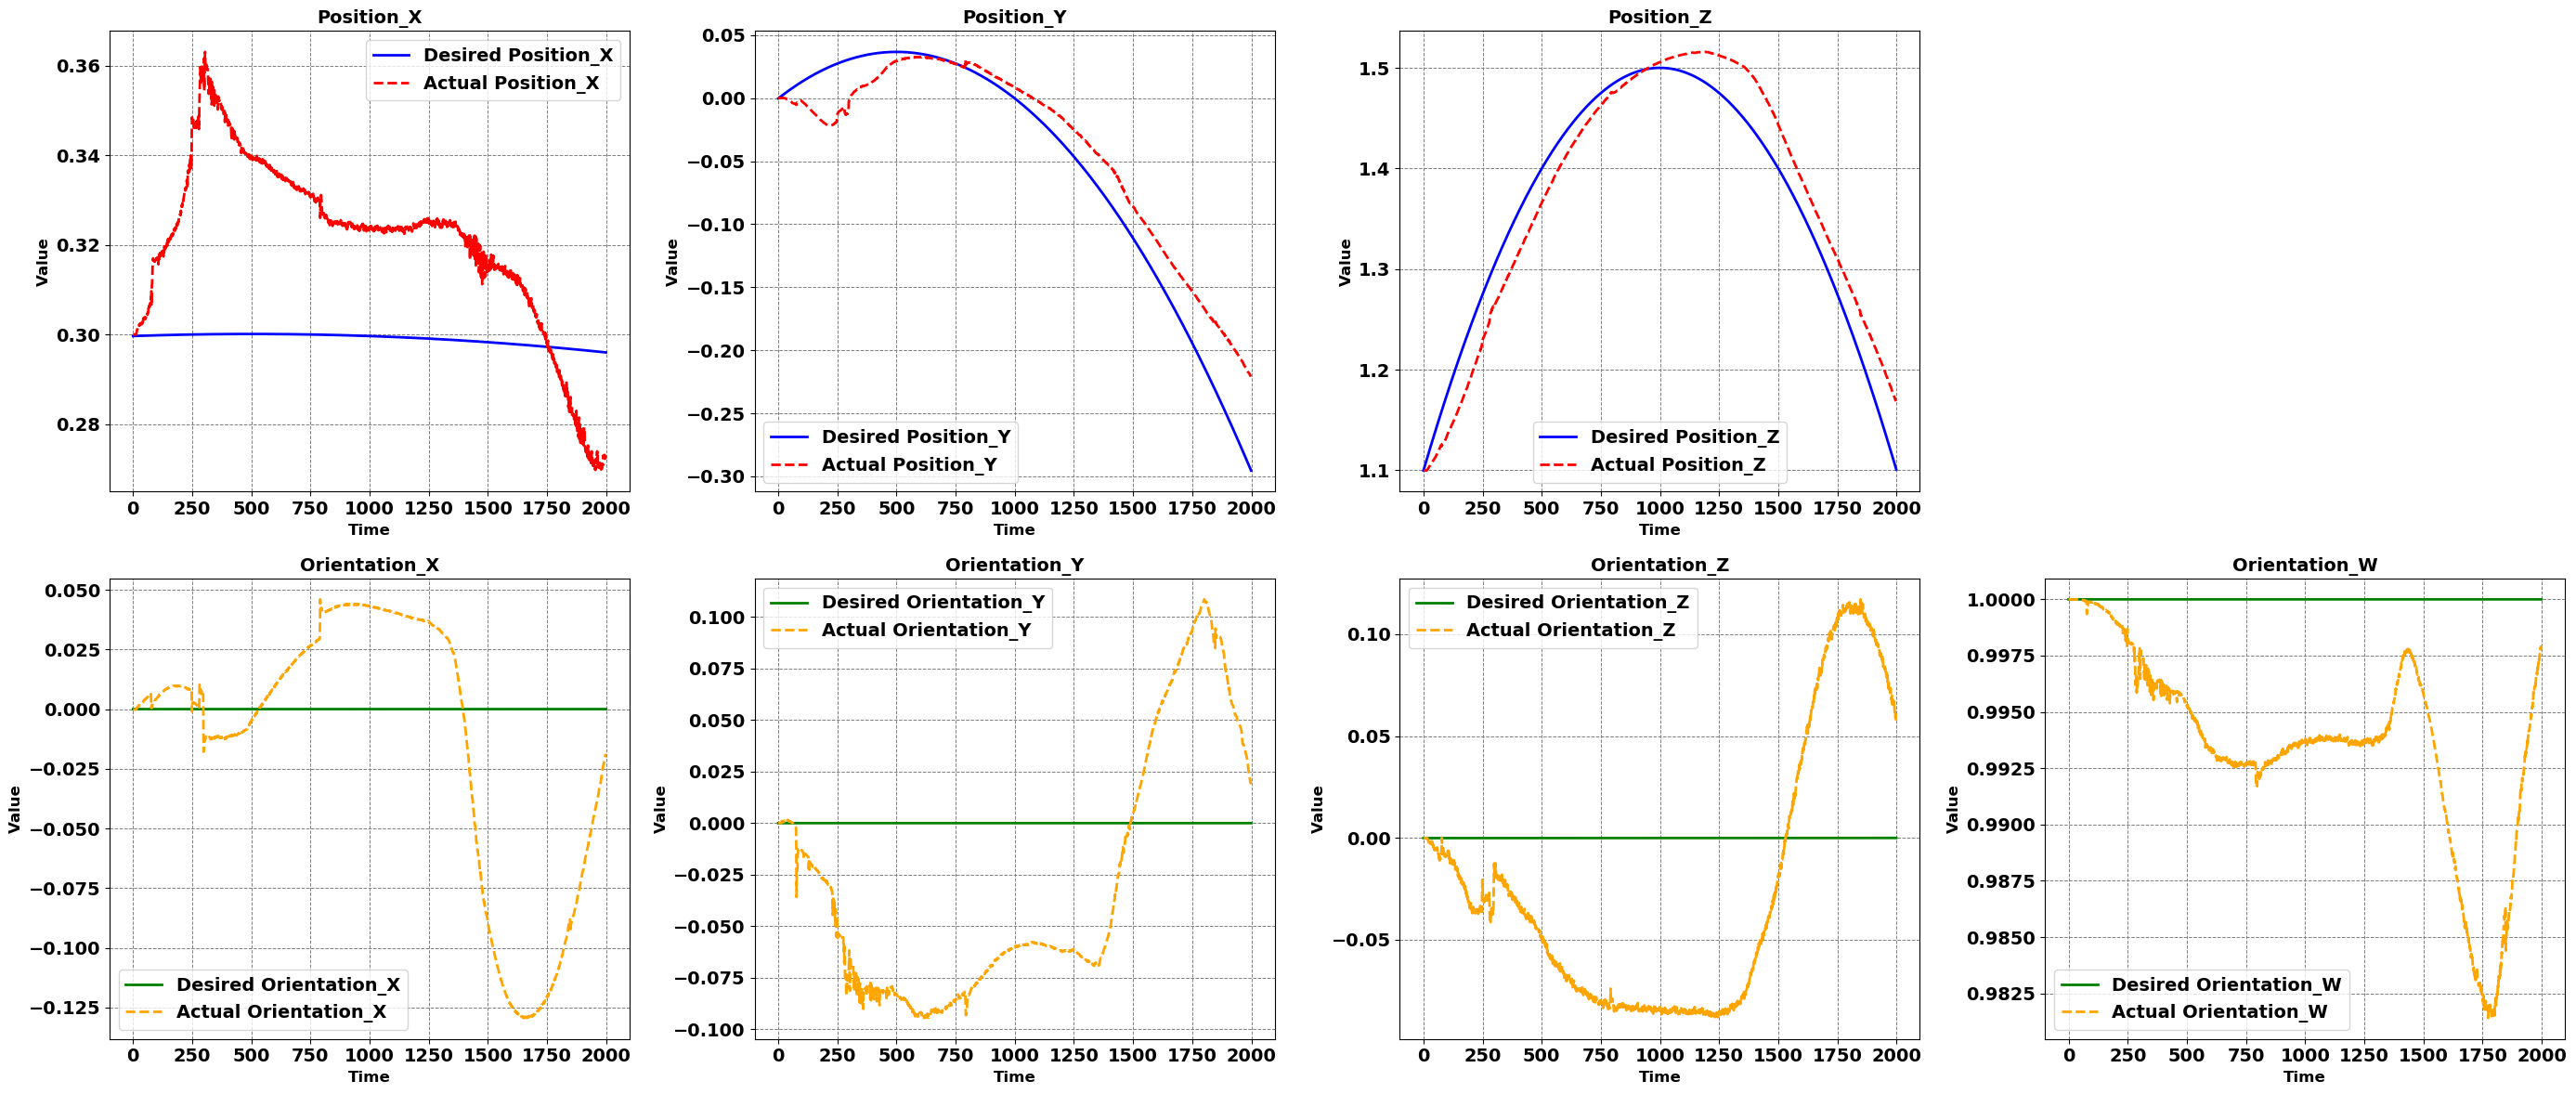

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
desired_file_name = 'box_trajectory.csv'  # Desired trajectory
actual_file_name = 'joint_angles.csv'  # Actual tracked trajectory

# Read the data from both files
df_desired = pd.read_csv(desired_file_name)
df_actual = pd.read_csv(actual_file_name)

# Define position and orientation columns for both desired and actual trajectories
position_columns = ['Position_X', 'Position_Y', 'Position_Z']
orientation_columns = ['Orientation_X', 'Orientation_Y', 'Orientation_Z', 'Orientation_W']
actual_position_columns = ['Box_Position_X', 'Box_Position_Y', 'Box_Position_Z']
actual_orientation_columns = ['Box_Orientation_X', 'Box_Orientation_Y', 'Box_Orientation_Z', 'Box_Orientation_W']

# Create subplots: 2 rows, 4 columns to accommodate both position and orientation data
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(28, 12))  # Adjust figure size for larger plots

# Adjust general plot styling
plt.rcParams.update({
    'font.size': 14,             # General font size
    'font.weight': 'bold',       # Bold font for better visibility
    'grid.color': 'gray',        # Grid color
    'grid.linestyle': '--',      # Dotted grid lines
    'grid.linewidth': 0.7,       # Thinner grid lines for better aesthetics
})

# Plot position data (X, Y, Z) in the first row for both desired and actual
for i, col in enumerate(position_columns):
    # Plot desired position
    axes[0, i].plot(df_desired[col], label='Desired ' + col, linewidth=2, color='blue')  
    # Plot actual position
    axes[0, i].plot(df_actual[actual_position_columns[i]], label='Actual ' + col, linewidth=2, color='red', linestyle='--')  
    axes[0, i].set_title(col, fontsize=14, weight='bold')  # Bold titles
    axes[0, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[0, i].set_ylabel('Value', fontsize=12, weight='bold')
    axes[0, i].grid(True)  # Add grid to the plot
    axes[0, i].legend()  # Add legend to differentiate between desired and actual

# Remove the last empty subplot in the first row (we only have 3 position columns)
fig.delaxes(axes[0, 3])

# Plot orientation data (X, Y, Z, W) in the second row for both desired and actual
for i, col in enumerate(orientation_columns):
    # Plot desired orientation
    axes[1, i].plot(df_desired[col], label='Desired ' + col, linewidth=2, color='green')  
    # Plot actual orientation
    axes[1, i].plot(df_actual[actual_orientation_columns[i]], label='Actual ' + col, linewidth=2, color='orange', linestyle='--')  
    axes[1, i].set_title(col, fontsize=14, weight='bold')  # Bold titles
    axes[1, i].set_xlabel('Time', fontsize=12, weight='bold')
    axes[1, i].set_ylabel('Value', fontsize=12, weight='bold')
    axes[1, i].grid(True)  # Add grid to the plot
    axes[1, i].legend()  # Add legend to differentiate between desired and actual

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a .pdf file with high resolution
output_file = 'box_trajectory_comparison_plot_high_res.pdf'
plt.savefig(output_file, format='pdf', dpi=600)  # Increase dpi to 600 for higher resolution

# Show the plot
plt.show()


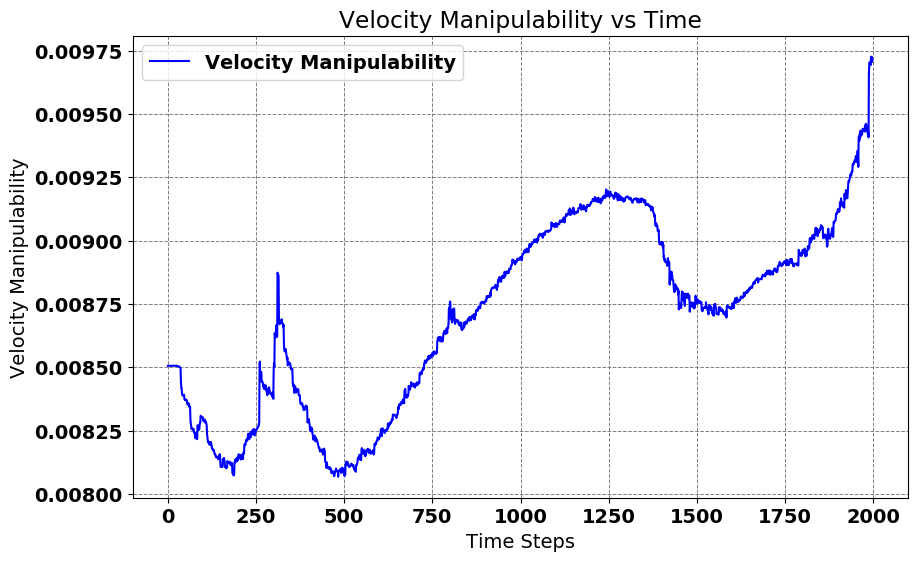

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'joint_angles.csv' with the actual path to your CSV file
csv_file = "joint_angles.csv"

# Read the CSV file
data = pd.read_csv(csv_file)

# Extract time and manipulability data
time = range(len(data))  # Assuming time steps are sequential based on the row number
velocity_manipulability = data['Velocity_Manipulability'].values  # Ensure it's a 1D numpy array

# Plot Manipulability vs Time
plt.figure(figsize=(10, 6))
plt.plot(time, velocity_manipulability, label='Velocity Manipulability', color='b')
plt.xlabel('Time Steps')
plt.ylabel('Velocity Manipulability')
plt.title('Velocity Manipulability vs Time')
plt.grid(True)
plt.legend()
plt.show()


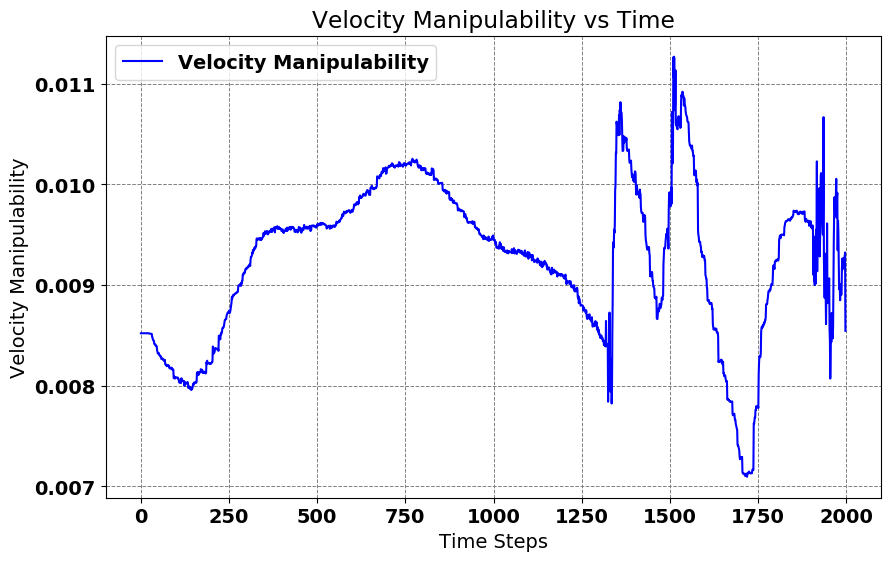

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'joint_angles.csv' with the actual path to your CSV file
csv_file = "joint_angles_without.csv"

# Read the CSV file
data = pd.read_csv(csv_file)

# Extract time and manipulability data
time = range(len(data))  # Assuming time steps are sequential based on the row number
velocity_manipulability = data['Velocity_Manipulability'].values  # Ensure it's a 1D numpy array

# Plot Manipulability vs Time
plt.figure(figsize=(10, 6))
plt.plot(time, velocity_manipulability, label='Velocity Manipulability', color='b')
plt.xlabel('Time Steps')
plt.ylabel('Velocity Manipulability')
plt.title('Velocity Manipulability vs Time')
plt.grid(True)
plt.legend()
plt.show()

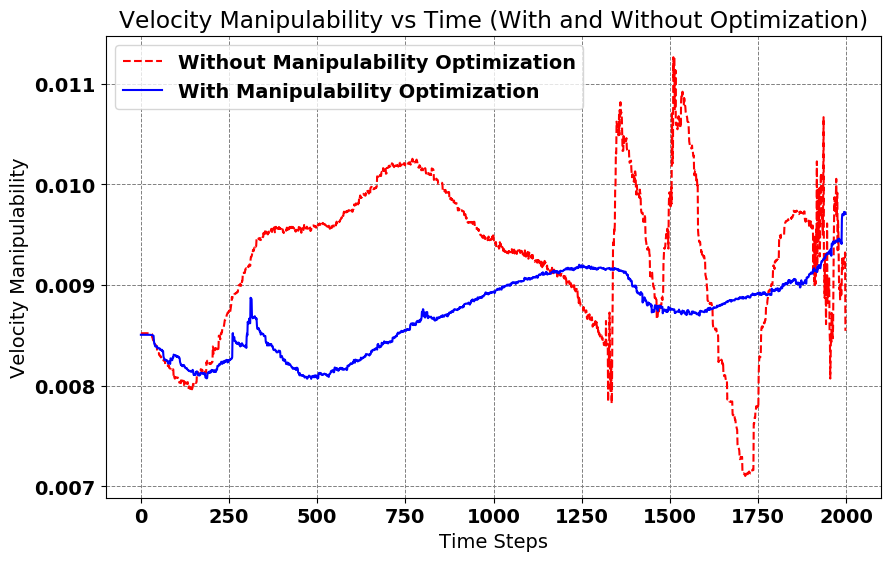

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from both CSV files
csv_file_without = "joint_angles_without.csv"
csv_file_with = "joint_angles.csv"

# Read both CSV files
data_without = pd.read_csv(csv_file_without)
data_with = pd.read_csv(csv_file_with)

# Extract time steps (assuming sequential based on row index)
time_without = range(len(data_without))
time_with = range(len(data_with))

# Extract velocity manipulability data
velocity_manip_without = data_without['Velocity_Manipulability'].values
velocity_manip_with = data_with['Velocity_Manipulability'].values

# Create a plot to compare both manipulability values
plt.figure(figsize=(10, 6))

# Plot manipulability without optimization
plt.plot(time_without, velocity_manip_without, label='Without Manipulability Optimization', color='r', linestyle='--')

# Plot manipulability with optimization
plt.plot(time_with, velocity_manip_with, label='With Manipulability Optimization', color='b')

# Add labels, title, and legend
plt.xlabel('Time Steps')
plt.ylabel('Velocity Manipulability')
plt.title('Velocity Manipulability vs Time (With and Without Optimization)')
plt.grid(True)
plt.legend()

# Show the combined plot
plt.show()
